In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

## Scatter Plot으로 시각화하기

In [20]:
df = pd.read_csv("/Users/idaeho/Documents/GitHub/Naver_BoostCourse/data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)

In [6]:
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(18943, 39)

In [8]:
df_seoul['시군구명'].value_counts().head()

시군구명
강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
Name: count, dtype: int64

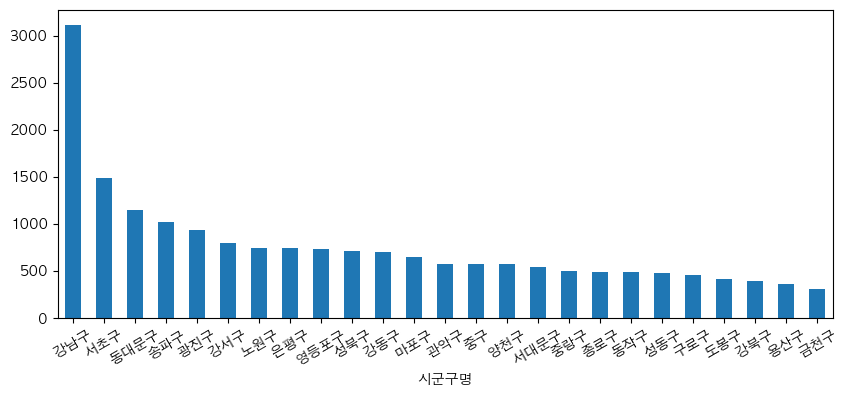

In [21]:
df_seoul['시군구명'].value_counts().plot.bar(figsize=(10, 4), rot=30);

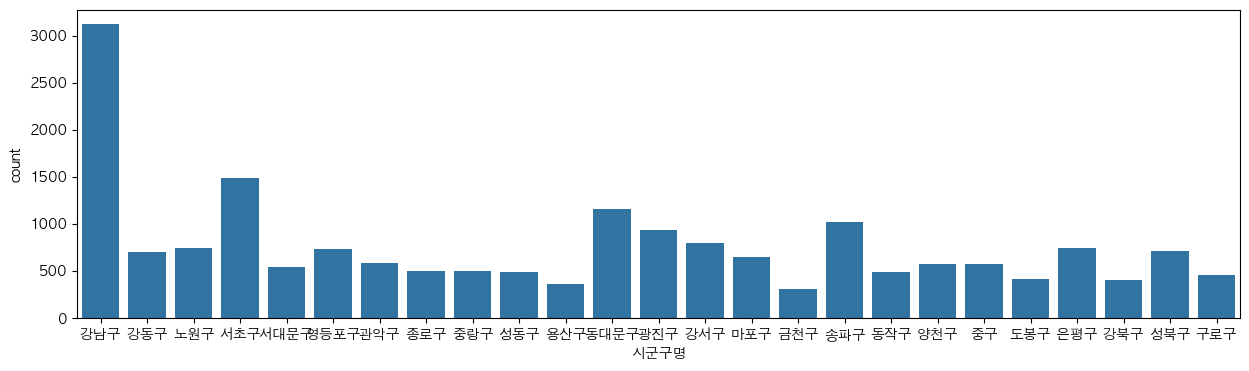

In [22]:
import seaborn as sns

plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul,
              x = '시군구명');

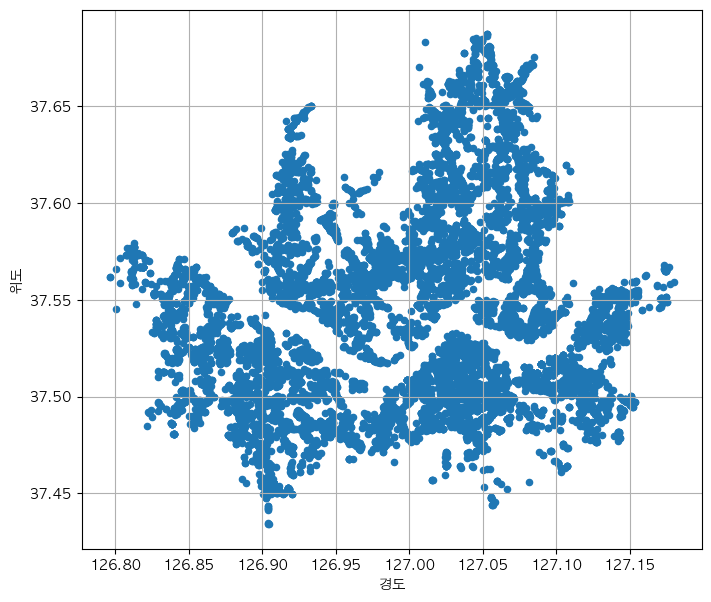

In [23]:
df_seoul[['경도', '위도', '시군구명']].plot.scatter(x='경도', y='위도', figsize=(8, 7), grid=True);

<Axes: xlabel='경도', ylabel='위도'>

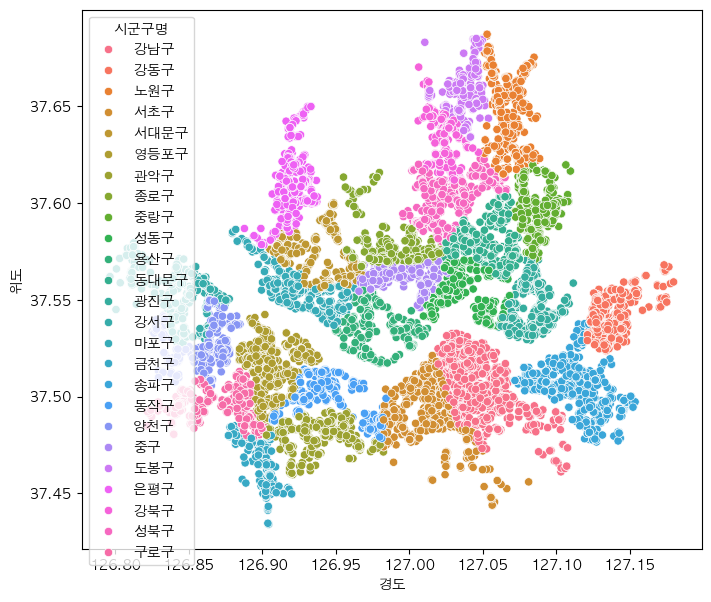

In [24]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_seoul,
                x = '경도',
                y = '위도', 
                hue = '시군구명');

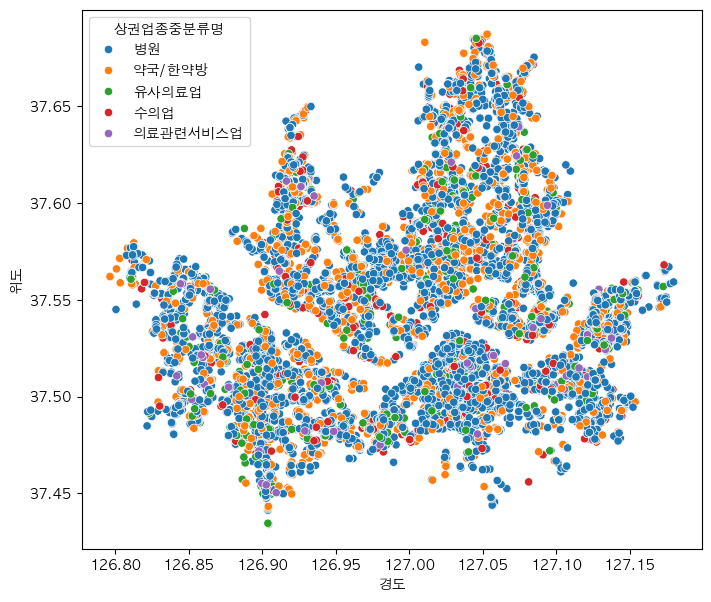

In [25]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_seoul,
                x = '경도',
                y = '위도', 
                hue = '상권업종중분류명');

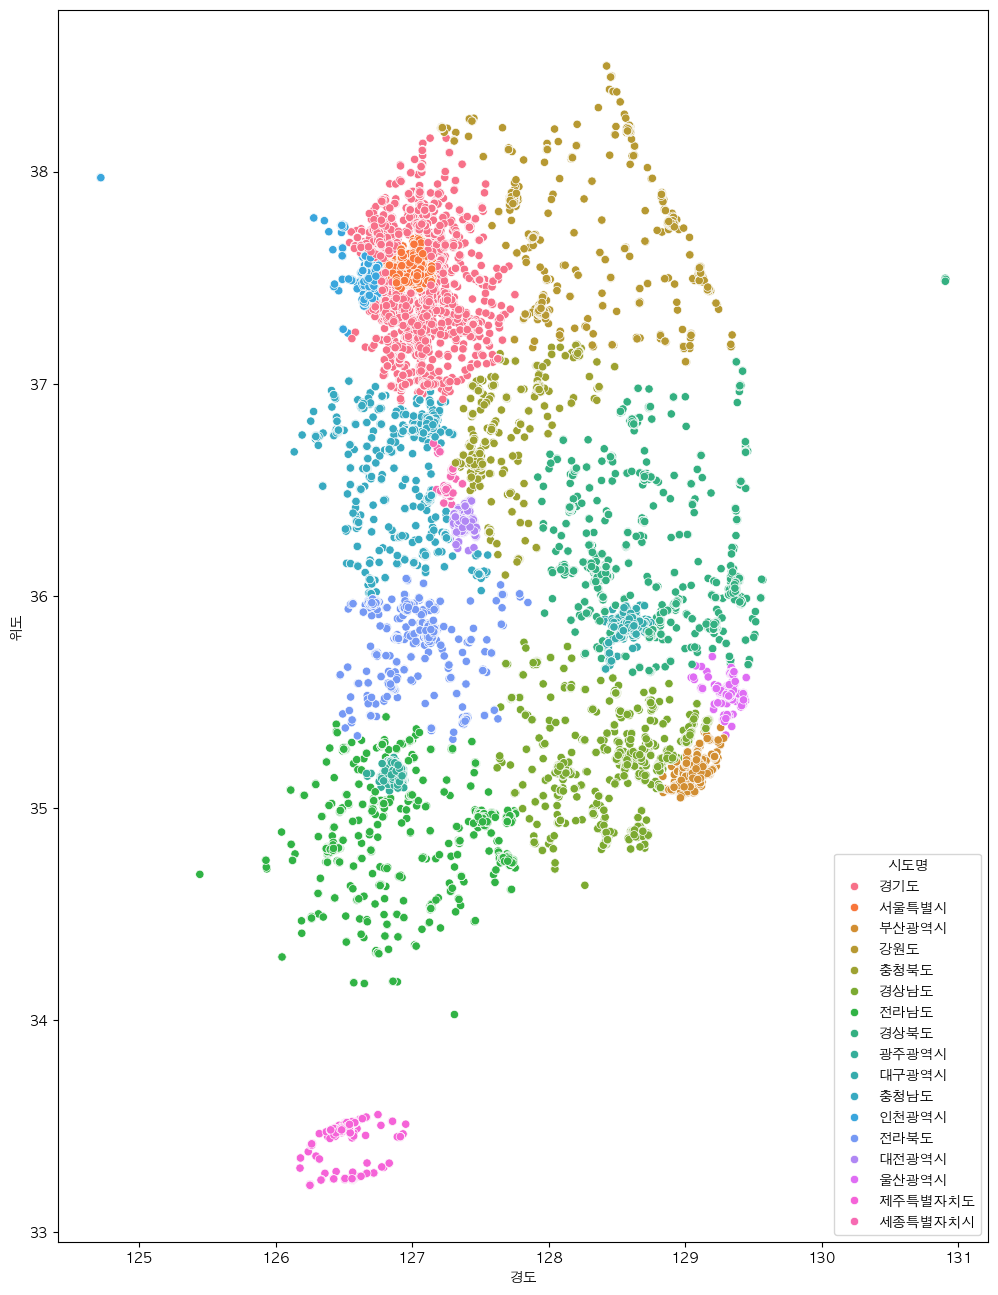

In [27]:
plt.figure(figsize=(12, 16))

sns.scatterplot(data=df, x='경도', y='위도', hue='시도명');

### Folium으로 지도 시각화하기

In [28]:
import folium

folium.Map() # 세계지도 출력

In [30]:
# "상권업종소분류명"이 "종합병원" 인 것과
# "시도명" 이 "서울특별시"인 데이터만 가져옵니다.
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"] == "서울특별시")].copy()
df_seoul_hospital.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048
353,20471487,홍익병원별관,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1147010100108970013001044,홍익병원별관,서울특별시 양천구 국회대로 250,158070.0,7937.0,NaN,1,NaN,126.862805,37.529213
385,20737057,SNUH,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107360055027688,성보빌딩,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,NaN,4,NaN,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296
2461,20024045,한양,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1120010700100150001019623,한대동문회관,서울특별시 성동구 마조로 22-2,133070.0,4763.0,NaN,4,NaN,127.041325,37.559469


In [ ]:
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

In [34]:
map = folium.Map(location=[df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()],
           zoom_start=12) # location을 넣어서 시각화할 수 있음

In [38]:
for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "상호명"]
    address = df_seoul_hospital.loc[n, "도로명주소"]
    
    popup = f"{name}-{address}"
    location = [df_seoul_hospital.loc[n, "위도"], df_seoul_hospital.loc[n, "경도"]]
    
    folium.Marker(
        location=location,
        popup=popup,
    ).add_to(map)
    
map